Ici cet algorithme permet de faire des prédictions sur plusieurs variables prédictives

Quand une variable cible est le fruit de la corrélation de plusieurs variables prédictives, on parle de Multivariate Regression pour faire des prédictions.

F(X) = e + alpha*x1 + beta*x2 + ... + omega*xn

X : est un vecteur/tableau de variables prédictives. Pour l’exemple de prédiction du prix de voiture, la taille du vecteur X sera égale à 3 (nombre de Km, nombre de cylindres, et le nombre de portes)

In [47]:
import pandas as pd
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
import numpy as np

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

In [48]:
df = pd.read_excel("algo/dataset/Multivariate_Linear_Regression_dataset.xlsx")

In [49]:
df.shape

(47, 3)

In [50]:
X = df.iloc[0:len(df),0]
Y = df.iloc[0:len(df),1]
Z = df.iloc[0:len(df),2]

In [51]:
print(X)

0     2104
1     1600
2     2400
3     1416
4     3000
5     1985
6     1534
7     1427
8     1380
9     1494
10    1940
11    2000
12    1890
13    4478
14    1268
15    2300
16    1320
17    1236
18    2609
19    3031
20    1767
21    1888
22    1604
23    1962
24    3890
25    1100
26    1458
27    2526
28    2200
29    2637
30    1839
31    1000
32    2040
33    3137
34    1811
35    1437
36    1239
37    2132
38    4215
39    2162
40    1664
41    2238
42    2567
43    1200
44     852
45    1852
46    1203
Name: taille_en_pieds_carre, dtype: int64


In [52]:
print(Y)

0     3
1     3
2     3
3     2
4     4
5     4
6     3
7     3
8     3
9     3
10    4
11    3
12    3
13    5
14    3
15    4
16    2
17    3
18    4
19    4
20    3
21    2
22    3
23    4
24    3
25    3
26    3
27    3
28    3
29    3
30    2
31    1
32    4
33    3
34    4
35    3
36    3
37    4
38    4
39    4
40    2
41    3
42    4
43    3
44    2
45    4
46    3
Name: nb_chambres, dtype: int64


In [53]:
print(Z)

0     399900
1     329900
2     369000
3     232000
4     539900
5     299900
6     314900
7     198999
8     212000
9     242500
10    239999
11    347000
12    329999
13    699900
14    259900
15    449900
16    299900
17    199900
18    499998
19    599000
20    252900
21    255000
22    242900
23    259900
24    573900
25    249900
26    464500
27    469000
28    475000
29    299900
30    349900
31    169900
32    314900
33    579900
34    285900
35    249900
36    229900
37    345000
38    549000
39    287000
40    368500
41    329900
42    314000
43    299000
44    179900
45    299900
46    239500
Name: prix, dtype: int64


In [54]:
print (df.head(6))

   taille_en_pieds_carre  nb_chambres    prix
0                   2104            3  399900
1                   1600            3  329900
2                   2400            3  369000
3                   1416            2  232000
4                   3000            4  539900
5                   1985            4  299900


In [55]:
fig = plt.figure()

<Figure size 432x288 with 0 Axes>

In [56]:
Y = df["prix"]

In [57]:
X = df[['taille_en_pieds_carre','nb_chambres']]

### Normalisation des features (Features Scaling) : les valeurs seront 
### approximativement comprises entre -1 et 1.
### La Normalisation est utile quand les ordres de grandeur des valeurs de nos 
### features sont trés différents :
### En effet, Taille d'une maison en "pieds²" est de quelques miliers,
### alors que le nombre de chambre est généralement plus petit que 10


La librairie Scikit learn de Python propose plusieurs classes et méthodes pour faire de la préparation de données (Data pre-processing) pour les algorithmes de Machine Learning. Le package sklearn.preprocessing propose la classe StandardScaler qui permettra de faire du features scaling sur toutes nos variables prédictives.

In [60]:
scale = StandardScaler()
X_scaled = scale.fit_transform(X[['taille_en_pieds_carre', 'nb_chambres']].values)

In [61]:
print (X_scaled)

[[ 1.31415422e-01 -2.26093368e-01]
 [-5.09640698e-01 -2.26093368e-01]
 [ 5.07908699e-01 -2.26093368e-01]
 [-7.43677059e-01 -1.55439190e+00]
 [ 1.27107075e+00  1.10220517e+00]
 [-1.99450507e-02  1.10220517e+00]
 [-5.93588523e-01 -2.26093368e-01]
 [-7.29685755e-01 -2.26093368e-01]
 [-7.89466782e-01 -2.26093368e-01]
 [-6.44465993e-01 -2.26093368e-01]
 [-7.71822042e-02  1.10220517e+00]
 [-8.65999486e-04 -2.26093368e-01]
 [-1.40779041e-01 -2.26093368e-01]
 [ 3.15099326e+00  2.43050370e+00]
 [-9.31923697e-01 -2.26093368e-01]
 [ 3.80715024e-01  1.10220517e+00]
 [-8.65782986e-01 -1.55439190e+00]
 [-9.72625673e-01 -2.26093368e-01]
 [ 7.73743478e-01  1.10220517e+00]
 [ 1.31050078e+00  1.10220517e+00]
 [-2.97227261e-01 -2.26093368e-01]
 [-1.43322915e-01 -1.55439190e+00]
 [-5.04552951e-01 -2.26093368e-01]
 [-4.91995958e-02  1.10220517e+00]
 [ 2.40309445e+00 -2.26093368e-01]
 [-1.14560907e+00 -2.26093368e-01]
 [-6.90255715e-01 -2.26093368e-01]
 [ 6.68172729e-01 -2.26093368e-01]
 [ 2.53521350e-01 -2

In [62]:
est = sm.OLS(Y, X).fit()

In [63]:
print (est.summary())

                                 OLS Regression Results                                
Dep. Variable:                   prix   R-squared (uncentered):                   0.966
Model:                            OLS   Adj. R-squared (uncentered):              0.964
Method:                 Least Squares   F-statistic:                              631.4
Date:                Fri, 23 Aug 2019   Prob (F-statistic):                    1.19e-33
Time:                        02:02:43   Log-Likelihood:                         -589.11
No. Observations:                  47   AIC:                                      1182.
Df Residuals:                      45   BIC:                                      1186.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                            coef    std err          t      P>|t|      [0.025      0.975]
------------------------------

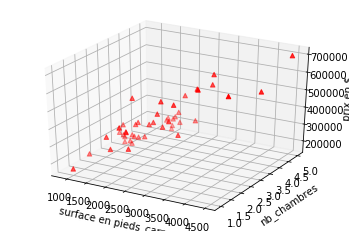

In [78]:
fig = plt.figure()
#use this line to print only one figure
#ax = fig.add_subplot(111, projection='3d')
ax = fig.add_subplot(projection='3d')
ax.scatter(df["taille_en_pieds_carre"], df["nb_chambres"], df["prix"], c='r', marker='^')

ax.set_xlabel('surface en pieds_carre')
ax.set_ylabel('nb_chambres')
ax.set_zlabel('prix en $')



frst_col_surface =  df.iloc[0:len(df),0] #selection de la première colonne de notre dataset
scnd_col_nb_chambre =  df.iloc[0:len(df),1]
third_col_prix = df.iloc[0:len(df),2]


In [65]:
def predict_price_of_house(taille_maison, nb_chambre):
    return 140.8611 * taille_maison + 1.698e+04 * nb_chambre # not scaled
    #return 1.094e+05 * taille_maison + (6578.3549 * nb_chambre) # scaled


### notre fonction prédiction sera definie par : 
## prix_estimé = F(superficie, nb_chambres) = ε + α * superficie + β * nb_chambres

In [66]:
def predict_all(lst_sizes, lst_nb_chmbres):
    predicted_prices = []
    for n in range(0, len(Y)):
        predicted_prices.append(predict_price_of_house(lst_sizes[n], lst_nb_chmbres[n]))
    return predicted_prices


In [67]:
#print predict_all(df["taille_en_pieds_carre"], df["nb_chambres"])

# set up the axes for the second plot
ax = fig.add_subplot(1, 2, 2, projection='3d')

In [72]:
ax.plot_trisurf(df["taille_en_pieds_carre"], df["nb_chambres"], predict_all(df["taille_en_pieds_carre"], df["nb_chambres"]))


plt.show()


### Exemple de prediction de prix de vente de maison en fonction de la taille de la maison et du nombre de chambre en tenant compte des données d'entrainement

In [71]:
print (predict_price_of_house(4500,5))

718774.95
